# Classifying Penguin Species

### Introduction

In this post, we will be using the Palmer Penguins data set collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. It was first published by Gorman, Williams, and Fraser (2014) and was nicely packaged and released for use in the data science community by Horst, Hill, and Gorman (2020). The data contains physiological measurements for a number of individuals from each of three species of penguin. The goal of this post is to investigate different machine learning models' performance to classify penguins' species based on penguins' quantitative and qualitative features. 

First, we access the training data

In [31]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# load dataset
train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)
train.shape

(275, 17)

### Data Preparation

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

# function to prepare X and y. 
def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

In [33]:
# get the one vocab name for the species. 
train["Species"] = train["Species"].str.split().str.get(0)
train

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap,Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap,Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap,Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,PAL0910,100,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N21A2,Yes,11/18/09,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863,NaN
271,PAL0809,69,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N32A1,No,11/11/08,35.9,16.6,190.0,3050.0,FEMALE,8.47781,-26.07821,Nest never observed with full clutch.
272,PAL0708,33,Adelie,Anvers,Dream,"Adult, 1 Egg Stage",N22A1,Yes,11/9/07,39.5,17.8,188.0,3300.0,FEMALE,9.66523,-25.06020,NaN
273,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


### Data Exploration and Visualization

##### Quantitative Feature Exploration

We want to understand how different species and sexs of penguins have different physical characteristics. After some primary data exploration of the dataset, we find that there is one incidence of Gentoo penguin whose sex is unknown. I decided to drop that row. 

In [34]:
train = train[train['Sex'] != "."]

During the [lecture](https://www.philchodrow.prof/ml-notes/chapters/02-black-box-classification.html), we have seen the scatterplot between `Culmen Depth (mm)` and `Culmen Length (mm)`. I want to investigate the other two quantitative features included in the dataset which are `Flipper Length (mm)` and `Body Mass (g)`. I will find the mean values of the flipper length and body mass for sexes of each penguin species. 

In [35]:
# group by species and sex and find the mean flipper length. 
mean_flipper = train.groupby(["Species", "Sex"])["Flipper Length (mm)"].mean().reset_index()
print(mean_flipper)

     Species     Sex  Flipper Length (mm)
0     Adelie  FEMALE           187.924528
1     Adelie    MALE           192.327869
2  Chinstrap  FEMALE           192.064516
3  Chinstrap    MALE           200.692308
4     Gentoo  FEMALE           212.836735
5     Gentoo    MALE           221.204545


Text(0.5, 1.0, 'Mean Filpper Length by Species and Sex')

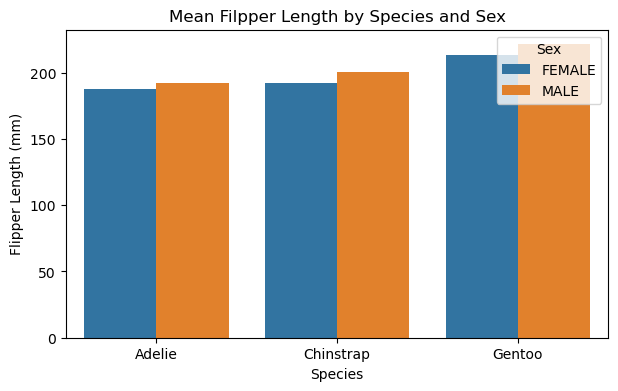

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot species vs flipper length
plt.figure(figsize=(7, 4))
sns.barplot(data=mean_flipper, x = "Species", y = "Flipper Length (mm)", hue="Sex")
plt.title("Mean Filpper Length by Species and Sex")


In [37]:
# group by species and sex and find the mean body mass. 
mean_mass = train.groupby(["Species", "Sex"])["Body Mass (g)"].mean().reset_index()
print(mean_mass)

     Species     Sex  Body Mass (g)
0     Adelie  FEMALE    3350.471698
1     Adelie    MALE    4052.868852
2  Chinstrap  FEMALE    3523.387097
3  Chinstrap    MALE    4005.769231
4     Gentoo  FEMALE    4684.693878
5     Gentoo    MALE    5476.704545


Text(0.5, 1.0, 'Mean Body Mass by Species and Sex')

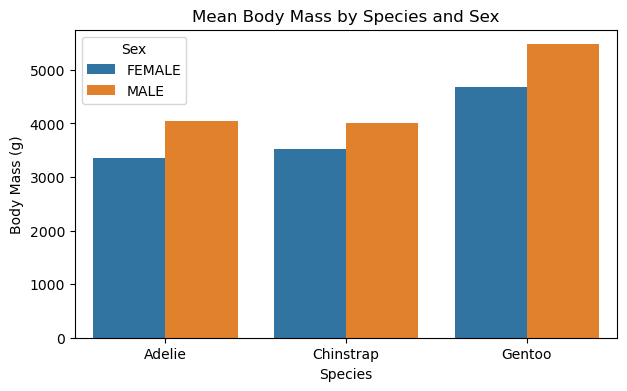

In [38]:
# plot mean body mass by species and sex
plt.figure(figsize=(7, 4))
sns.barplot(data=mean_mass, x = "Species", y = "Body Mass (g)", hue="Sex")
plt.title("Mean Body Mass by Species and Sex")

From these two barplot, we can see that compare to `Flipper Length (mm)`, the difference of mean `Body Mass (g)` between species seems to be more significant, if we don't concern the scales and units of the two measures. Both sexes of Gentoo have obviously larger average weight than the other two penguin species. 

Next, I construct two scatterplots: Flipper Length vs. Culmen Length and Body Mass vs. Culmen Length. It would be ideal to see the dots of each penguin species clustering in a region, and that region does not contain other species. 

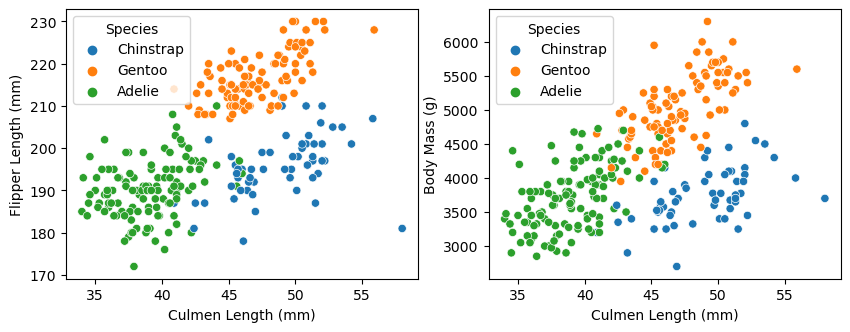

In [39]:
# plott scatter plot of the species in different variables. 
fig, ax = plt.subplots(1, 2, figsize = (10, 3.5))

p1 = sns.scatterplot(train, x = "Culmen Length (mm)", y = "Flipper Length (mm)", hue = "Species", ax = ax[0])
p2 = sns.scatterplot(train, x = "Culmen Length (mm)", y = "Body Mass (g)", hue = "Species", ax = ax[1])

From the scatterplots above, it seems that both `Flipper Length (mm)` and `Body Mass (g)` are good at differentiating Gentoo from the other two species. 

##### Qualitative Feature Exploration

Here I want to explore how `Island` and `Clutch Completion` could help us in differentiating between penguin species. 

In [40]:
# count how many recorded individuals are on each island
island_species = train.groupby(["Island", "Species"]).size().reset_index(name='count')
island_species

,Island,Species,count
0,Biscoe,Adelie,33
1,Biscoe,Gentoo,97
2,Dream,Adelie,45
3,Dream,Chinstrap,57
4,Torgersen,Adelie,42


This table shows that Gentoo is only populated in Biscoe Island and Chinstrap is populated in Dream Island. Adelie is populated in the three islands. Therefore, `Island` is a good qualitative feature to distinguish between Gentoo and Chinstrap Island. 

In [41]:
# count clutch for different species
clutch_species = train.groupby(["Clutch Completion", "Species"]).size().reset_index(name = 'count')
clutch_species

,Clutch Completion,Species,count
0,No,Adelie,12
1,No,Chinstrap,10
2,No,Gentoo,8
3,Yes,Adelie,108
4,Yes,Chinstrap,47
5,Yes,Gentoo,89


From the table above, we cannot see a very clear distinction between penguin species and their clutch completion status. Therefore, we are not using this feature as part of our feature combination. 

### Choosing Features by Logistic Regression

In [42]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


LR = LogisticRegression()

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Island"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

# initialize best score and best features. 
best_score = 0
best_features = []

# loop through combinations of columns to find the best one. 
for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    LR.fit(X_train[cols], y_train)
    cv_scores_LR = cross_val_score(LR, X_train[cols], y_train, cv = 5).mean()

    # select the combination that has the best score. 
    if cv_scores_LR > best_score:
            best_score = cv_scores_LR
            best_columns = cols
     
print("Best columns:", best_columns)
print("Best score:", best_score)

Best columns: ['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Culmen Depth (mm)']
Best score: 0.9922322775263952


The best features for the logistic regression model are `Island`, `Culmen Length (mm)`, and `Culmen Depth (mm)`. It means that only using this combination of features could easily help us differentiate between penguin species. 

### Model Choices

We used Logistic Regression to choose the feature combination. We will use that combination for our model selection. First, here is the accuracy of Logistic Regression, which we have shown above. 

In [43]:
# fit logistic regression to training data
LR.fit(X_train[best_columns], y_train)
cv_scores_LR = cross_val_score(LR, X_train[best_columns], y_train, cv = 5).mean()
cv_scores_LR

0.9922322775263952

We have several other models to choose from. These models are Decision Trees, Random Forest, and SVC. We first import these models from `sklearn`. Let's build these models and see their performance on the training data themselves. Similar to the section above, we would employ cross-validation and calculate the mean accuracy to evaluate the performance of the model. 

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Decision Tree

In [45]:
# initialize decison tree classifier
DT = DecisionTreeClassifier(max_depth=5, random_state=30)
# fit decision tree classifier to training data. 
DT.fit(X_train[best_columns], y_train)
cv_Scores_DT = cross_val_score(DT, X_train[best_columns], y_train, cv = 5).mean()
cv_Scores_DT

0.9687028657616892

Random Forest

In [46]:
# initialize random forest
RF = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
# fit the model to training data
RF.fit(X_train[best_columns], y_train)
cv_Scores_RF = cross_val_score(RF, X_train[best_columns], y_train, cv = 5).mean()
cv_Scores_RF

0.9883107088989442

Support Vector Machine

In [47]:
# generate gamma values using logspace. 
gamma_values = np.logspace(-3, 2, num=6)
print(gamma_values)
# loop over different gamma values and find the one that gives us th best result
for gma in gamma_values:
    svc = SVC(gamma=gma, C=1, random_state=42)
    svc.fit(X_train[best_columns], y_train)
    cv_Scores_SVC = cross_val_score(svc, X_train[best_columns], y_train, cv = 5).mean()
    print(cv_Scores_SVC)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
0.9217948717948717
0.9648567119155353
0.9687782805429863
0.9610105580693815
0.7578431372549019
0.4530920060331825


I will choose `gamma = 0.1` as the parameter for the SVC model. 

### Testing

In [48]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)
# separate variables. 
X_test, y_test = prepare_data(test)
# test scores for different models. 
LR_test_score = LR.score(X_test[best_columns], y_test)
DT_test_score = DT.score(X_test[best_columns], y_test)
RF_test_score = RF.score(X_test[best_columns], y_test)
# support vector machine and its test score
svc = SVC(gamma=0.1, C=1, random_state=42)
svc.fit(X_train[best_columns], y_train)
SVC_test_score = svc.score(X_test[best_columns], y_test)

print("Logistic Regression Score:", LR_test_score)
print("Decision Tree Score:", DT_test_score)
print("Random Forest Score:", RF_test_score)
print("SVC Score:", SVC_test_score)


Logistic Regression Score: 1.0
Decision Tree Score: 0.9852941176470589
Random Forest Score: 1.0
SVC Score: 0.9852941176470589


Our testig results show that logiistic regression model and random forest model both give us 100% accuracy for the testing data!

### Plotting Decision Regions

In [49]:
# Since my best columns' first three elements are qualitative. I modified the function. 

from matplotlib.patches import Patch
# function to plot decision regions. 
def plot_regions(model, X, y):
    
    x0 = X[X.columns[3]]
    x1 = X[X.columns[4]]
    qual_features = X.columns[0:3]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[3] : XX,
          X.columns[4] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      XY = XY[X.columns]

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[3], 
            ylabel  = X.columns[4], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

Here is the decision regions of Logistic Regression Model, which gave us 100% accuracy rate. 

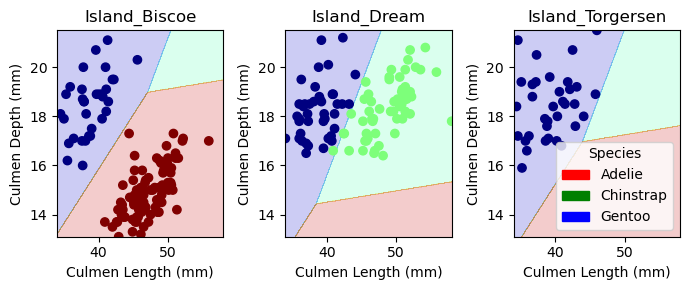

In [50]:
plot_regions(LR, X_train[best_columns], y_train)

Here is the decision regions of Random Forest Model, which gave us 100% accuracy rate. 

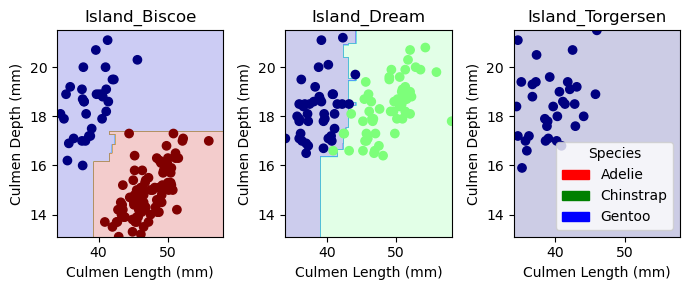

In [52]:
plot_regions(RF, X_train[best_columns], y_train)

It is noticeable that the decision regions for Chinstrap and Adelie penguins got more restrictive and small. Only regions that are very close to the training data are included as the decision region for these two species. The boundary of the region got more cursive than it was when $\mathbf{gamma} = 0.1$

### Confusion Matrix

Confusion Matrix for Logistic Regression

In [55]:
from sklearn.metrics import confusion_matrix

y_test_pred_LR = LR.predict(X_test[best_columns])
LR_C = confusion_matrix(y_test, y_test_pred_LR)
LR_C

array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 26]])

Confusion Matrix for Decision Trees

In [56]:
y_test_pred_DT = DT.predict(X_test[best_columns])
DT_C = confusion_matrix(y_test, y_test_pred_DT)
DT_C

array([[30,  0,  1],
       [ 0, 11,  0],
       [ 0,  0, 26]])

In [57]:
for i in range(3):
    for j in range(3):
        print(f"There were {DT_C[i,j]} {le.classes_[i]} penguin(s) who were classified as {le.classes_[j]}.")

There were 30 Adelie Penguin (Pygoscelis adeliae) penguin(s) who were classified as Adelie Penguin (Pygoscelis adeliae).
There were 0 Adelie Penguin (Pygoscelis adeliae) penguin(s) who were classified as Chinstrap penguin (Pygoscelis antarctica).
There were 1 Adelie Penguin (Pygoscelis adeliae) penguin(s) who were classified as Gentoo penguin (Pygoscelis papua).
There were 0 Chinstrap penguin (Pygoscelis antarctica) penguin(s) who were classified as Adelie Penguin (Pygoscelis adeliae).
There were 11 Chinstrap penguin (Pygoscelis antarctica) penguin(s) who were classified as Chinstrap penguin (Pygoscelis antarctica).
There were 0 Chinstrap penguin (Pygoscelis antarctica) penguin(s) who were classified as Gentoo penguin (Pygoscelis papua).
There were 0 Gentoo penguin (Pygoscelis papua) penguin(s) who were classified as Adelie Penguin (Pygoscelis adeliae).
There were 0 Gentoo penguin (Pygoscelis papua) penguin(s) who were classified as Chinstrap penguin (Pygoscelis antarctica).
There were

One Adelie Penguin is misidentified as a Gentoo Penguin by the Decision Trees Model. 

Confusion Matrix for Random Forest

In [58]:
y_test_pred_RF = RF.predict(X_test[best_columns])
RF_C = confusion_matrix(y_test, y_test_pred_RF)
RF_C

array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 26]])

Confusion Matrix for SVC

In [59]:
y_test_pred_svc = svc.predict(X_test[best_columns])
svc_C = confusion_matrix(y_test, y_test_pred_svc)
svc_C

array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 25]])

In [60]:
for i in range(3):
    for j in range(3):
        print(f"There were {svc_C[i,j]} {le.classes_[i]} penguin(s) who were classified as {le.classes_[j]}.")

There were 31 Adelie Penguin (Pygoscelis adeliae) penguin(s) who were classified as Adelie Penguin (Pygoscelis adeliae).
There were 0 Adelie Penguin (Pygoscelis adeliae) penguin(s) who were classified as Chinstrap penguin (Pygoscelis antarctica).
There were 0 Adelie Penguin (Pygoscelis adeliae) penguin(s) who were classified as Gentoo penguin (Pygoscelis papua).
There were 0 Chinstrap penguin (Pygoscelis antarctica) penguin(s) who were classified as Adelie Penguin (Pygoscelis adeliae).
There were 11 Chinstrap penguin (Pygoscelis antarctica) penguin(s) who were classified as Chinstrap penguin (Pygoscelis antarctica).
There were 0 Chinstrap penguin (Pygoscelis antarctica) penguin(s) who were classified as Gentoo penguin (Pygoscelis papua).
There were 0 Gentoo penguin (Pygoscelis papua) penguin(s) who were classified as Adelie Penguin (Pygoscelis adeliae).
There were 1 Gentoo penguin (Pygoscelis papua) penguin(s) who were classified as Chinstrap penguin (Pygoscelis antarctica).
There were

One Gentoo penguin is misidentified as a Chinstrap penguin by the SVC model. 

### Discussion

In this post, I made some further investigation of the Penguin Dataset and tried out different machine learning models for classification. I selected the three features for classification using some preliminary data exploration and testing iterations of feature combinations on the Logistic Regression model to find the combination that gives me the best accuracy in the model. Then I tested Decision Tree, Random Forest, and Support Vector Machine models using the cross-validation on the training data and plotted their decision regions. At the final testing step, I used all these models and found that Logistic Regression and Random Forest models both give me a 100% accuracy. 

When choosing the parameters at the modeling building step, I ran into risk of overfitting my model, even though a large portion of the risk is avoided by cross-validation. For example, when selecting the gamma value, I chose the gamma that gives me the best result in the training data. 

It is very interesting to see the decision regions of different models. The shapes of the regions reflect how different models work and classify the data. The boundaries of the tree models' decision regions are parallel to the axis, while the logistic regression and support vector machine has linear and non-linear lines to seperate different decision regions. Also, when $\mathbf{gamma}$ gets larger, the model becomes more prudent in drawing decision regions for two penguin species, risking of overfitting the model. 